<a href="https://colab.research.google.com/github/EderCruz/Alura-ImersaoDados/blob/main/DesafiosAula02_Eder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)

Text(0, 0.5, 'Proporção Alunos %')

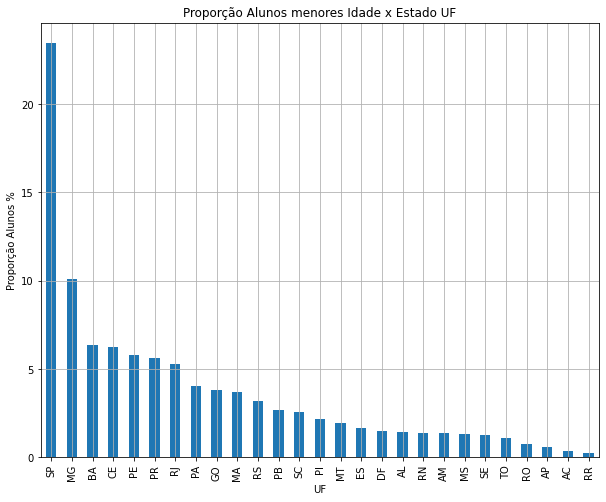

In [ ]:
#Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e comparar a proporção por estado.

alunos_menor_idade = dados.query("NU_IDADE < 18")
bar_alunos_menor_idade = (alunos_menor_idade["SG_UF_RESIDENCIA"].value_counts(normalize=True)*100).plot.bar(figsize=(10,8), grid = True)
tblBar = bar_alunos_menor_idade
tblBar.set_title('Proporção Alunos menores Idade x Estado UF')
tblBar.set_xlabel('UF')
tblBar.set_ylabel('Proporção Alunos %')


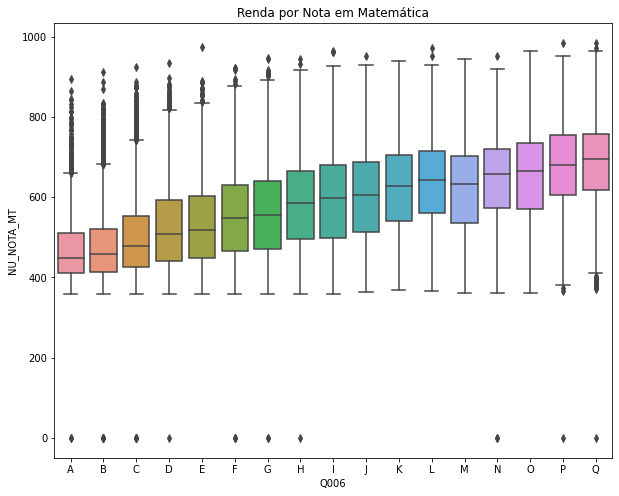

In [5]:
#Desafio 3: Criar uma função para plotar o boxplot do seaborn
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

ordemQ006 = dados['Q006'].sort_values().unique()

def plotBoxParamEnem( eixoX, eixoY, dadosDataFrame,  titulo, ordem):
  plt.figure(figsize=(10,8))
  sns.boxplot(x=eixoX, y = eixoY, data = dadosDataFrame, order = ordem)    
  plt.title(titulo)
    

plotBoxParamEnem('Q006', 'NU_NOTA_MT', dados,'Renda por Nota em Matemática', ordemQ006)

In [ ]:
#Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente
zerouProvas = dados.query("NU_NOTA_CN == 0 or NU_NOTA_MT == 0 or NU_NOTA_CH == 0 or NU_NOTA_LC == 0")
zerouProvas[["TP_PRESENCA_CN", "NU_NOTA_CN","TP_PRESENCA_MT","NU_NOTA_MT", "TP_PRESENCA_CH","NU_NOTA_CH", "TP_PRESENCA_LC","NU_NOTA_LC"]]

#Só possui valores númericos quem tem o valor nos campos de presença igual a 1, isto é, compareceu a prova
#Valores nos campos de presença 0 ou 2, faltou ou eliminado respectivaente, sempre tem valor NaN

,TP_PRESENCA_CN,NU_NOTA_CN,TP_PRESENCA_MT,NU_NOTA_MT,TP_PRESENCA_CH,NU_NOTA_CH,TP_PRESENCA_LC,NU_NOTA_LC
885,0,NaN,0,NaN,1,0.0,1,338.6
2496,1,346.9,1,528.6,1,0.0,1,436.6
2666,1,372.7,1,465.0,1,0.0,1,0.0
3612,0,NaN,0,NaN,1,0.0,1,384.6
4923,1,373.4,1,0.0,1,0.0,1,418.5
...,...,...,...,...,...,...,...,...
124766,1,555.0,1,606.1,1,0.0,1,597.5
125672,1,360.5,1,444.0,1,0.0,1,323.2
126298,0,NaN,0,NaN,1,0.0,1,384.0
126469,0,NaN,0,NaN,1,0.0,1,459.1


In [ ]:
#Outra solução desafi o 4 
presencas = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']

provas.append('NU_NOTA_TOTAL')
notas_zeradas = dados.query('NU_NOTA_TOTAL == 0')

faltantes = notas_zeradas.query('TP_PRESENCA_CN==0 and TP_PRESENCA_CH==0 and TP_PRESENCA_LC==0 and TP_PRESENCA_MT==0')
eliminados = notas_zeradas.query('TP_PRESENCA_CN==2 or TP_PRESENCA_CH==2 or TP_PRESENCA_LC==2 or TP_PRESENCA_MT==2')

resultado = pd.DataFrame({
    'Infor': ['Ausentes', 'Eliminados'],
    'Totais': [faltantes['NU_INSCRICAO'].count(), eliminados['NU_INSCRICAO'].count()]
})

resultado

In [ ]:
#Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)
eliminado = dados.query("TP_PRESENCA_CN ==  2 or TP_PRESENCA_MT == 2 or TP_PRESENCA_CH== 2 or TP_PRESENCA_LC== 2 ") 
eliminado[["TP_PRESENCA_CN", "NU_NOTA_CN","TP_PRESENCA_MT","NU_NOTA_MT", "TP_PRESENCA_CH","NU_NOTA_CH", "TP_PRESENCA_LC","NU_NOTA_LC"]]


#Valores de 0 ou 2 nos campos TP_PRESENCA_CN, TP_PRESENCA_MT, TP_PRESENCA_CH, TP_PRESENCA_LC represetam respectivamente  "Falta" e "Eliminado"
#Os campos de Nota sempre estão com o valor NaN caso o valor de campos de presença senham 0 ou 2, quando o valor é 1, a nota tem um valor númerico



,TP_PRESENCA_CN,NU_NOTA_CN,TP_PRESENCA_MT,NU_NOTA_MT,TP_PRESENCA_CH,NU_NOTA_CH,TP_PRESENCA_LC,NU_NOTA_LC
77,0,NaN,0,NaN,2,NaN,2,NaN
396,0,NaN,0,NaN,2,NaN,2,NaN
446,0,NaN,0,NaN,2,NaN,2,NaN
609,0,NaN,0,NaN,2,NaN,2,NaN
728,0,NaN,0,NaN,2,NaN,2,NaN
...,...,...,...,...,...,...,...,...
125216,0,NaN,0,NaN,2,NaN,2,NaN
125503,2,NaN,2,NaN,1,472.4,1,476.8
125784,0,NaN,0,NaN,2,NaN,2,NaN
126769,0,NaN,0,NaN,2,NaN,2,NaN


Text(0.5, 1.0, 'Treineiros X Renda')

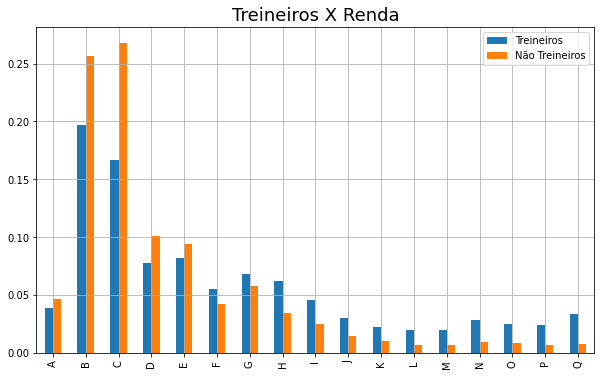

In [14]:
#Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.
treine = dados.query('IN_TREINEIRO == 1')
nao_treine = dados.query('IN_TREINEIRO != 1')

trene_q006 = treine['Q006'].value_counts(normalize = True)
n_trene_q006 = nao_treine['Q006'].value_counts(normalize = True)

treineiros = dados.query('IN_TREINEIRO==1')['Q006'].value_counts(normalize=True).mul(100).sort_index()
nao_treineiros = dados.query('IN_TREINEIRO==0')['Q006'].value_counts(normalize=True).mul(100).sort_index()

df = pd.DataFrame({'Treineiros':trene_q006, 'Não Treineiros': n_trene_q006})
ax = df.plot.bar(figsize=(10,6), grid = True)
ax.set_title('Treineiros X Renda', fontsize=18)

Text(0.5, 1.0, 'Nota Tota x Com/Sem Internet')

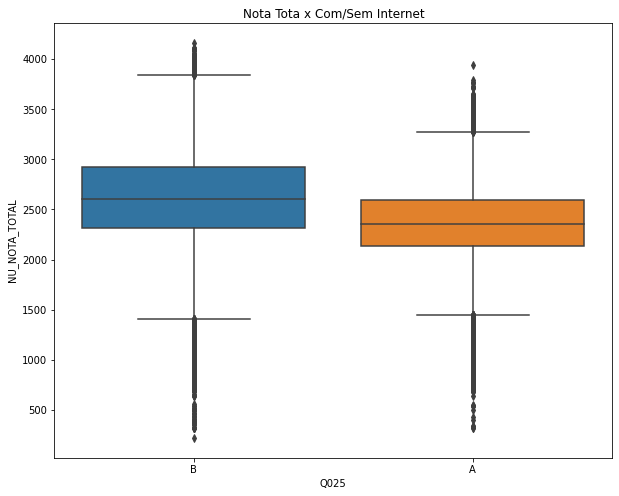

In [20]:
#Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO" ]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1 )
provas.append("NU_NOTA_TOTAL")
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL!=0")
dados_sem_nota_zero.head()


plt.figure(figsize=(10,8))
sns.boxplot(x='Q025', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero  )
plt.title('Nota Tota x Com/Sem Internet')


In [ ]:
#Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.


Def 7  a fazer
com_internet = dados.query("Q025=='B'")['Q006'].value_counts(normalize=True).mul(100).sort_index()
sem_internet = dados.query("Q025=='A'")['Q006'].value_counts(normalize=True).mul(100).sort_index()

df = pd.DataFrame({'Possui Internet':com_internet, 'Sem Internet': sem_internet})
ax = df.plot.bar(figsize=(10,6))
ax.set_title('Possui Internet X Renda', fontsize=18)


#Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.
plt.figure(figsize=(4, 6))
sns.boxplot(x="Q025", y = "NU_NOTA_TOTAL", data = dados,width=(0.4))
plt.title("Nota total para alunos com ou sem acesso à internet em residência")


Outra maneira de fazer o Desafio  da Thainá

import pandas as pd
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format
drive.mount('/gdrive', force_remount=True)

path = '/gdrive/My Drive/Colab Notebooks/Imersão Dados Alura/Dados Enem 2019'
os.chdir(path)
!ls

file = os.path.join(path, 'MICRODADOS_ENEM_2019.csv')

Mounted at /gdrive
MICRODADOS_ENEM_2019.csv  MICRODADOS_ENEM_2019_IDADES13E14.csv

chunks = []
for chunk in pd.read_csv(
                          file,
                          low_memory=False,
                          chunksize = 50000,
                          encoding="ISO-8859-1",
                          delimiter=";"):
  chunk = chunk.query('NU_IDADE == 13 or NU_IDADE == 14')
  chunks.append(chunk)  

tableAge_13and14 = pd.concat(chunks)

ave_file = os.path.join(path, 'MICRODADOS_ENEM_2019_IDADES13E14.csv')
tableAge_13and14.to_csv(save_file, sep=';')

tableAge_13and14

MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e comparar a proporção por estado.

Desafio 3: Criar uma função para plotar o boxplot do seaborn

Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

DEsafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.